In [1]:
# Import Important Libraries
import sklearn
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
import numpy as np
# import math
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy.polynomial.polynomial as poly
from sklearn.metrics import precision_recall_fscore_support
%matplotlib inline
%matplotlib inline

In [2]:
df = pd.read_csv('csgo_round_snapshots.csv',header = 0)
df = df.dropna()


In [3]:
#Extract our weapons features
weapons_ct = df.loc[:, 'ct_weapon_ak47':'ct_weapon_tec9':2]
weapons_t = df.loc[:, 't_weapon_ak47':'t_weapon_tec9':2]


#Compile list of costs for each weapon
cost_list = np.array([2700,3300,4750,1400,500,400,2050,5000,1800,200,5200,2900,3100,1050,1300,1500,1500,1250,1700,1050,2350,600,1100,5000,3000,1700,1200,2000,700,500,200,300,200,500])
cost_list = np.transpose(cost_list)
#Calculate total weapon costs for T and CT
total_cost_ct = np.dot(weapons_ct,cost_list)
total_cost_t = np.dot(weapons_t,cost_list)


In [4]:
df_NW = df.drop(df.iloc[:, 16:84], axis = 1)
df_NW.insert(17,"Total Weapon Cost T", np.transpose(total_cost_t))
df_NW.insert(17,"Total Weapon Cost CT", np.transpose(total_cost_ct))

In [5]:

df_NW["round_winner"] = np.where(df_NW.round_winner ==  "CT", 1, 0)
df_NW["bomb_planted"] = np.where(df_NW.bomb_planted ==  "True", 1,0)

df_dust2 = df_NW.loc[df_NW["map"] == "de_dust2"]
df_inferno = df_NW.loc[df_NW["map"] == "de_inferno"]
df_nuke = df_NW.loc[df_NW["map"] == "de_nuke"]
df_mirage = df_NW.loc[df_NW["map"] == "de_mirage"]
df_overpass = df_NW.loc[df_NW["map"] == "de_overpass"]
df_cache = df_NW.loc[df_NW["map"] == "de_cache"]
df_vertigo = df_NW.loc[df_NW["map"] == "de_vertigo"]
df_train  = df_NW.loc[df_NW["map"] == "de_train"]
df_lst = [df_dust2,df_inferno,df_nuke,df_mirage,df_overpass,df_cache,df_vertigo,df_train]

In [6]:

#Functions Needed
# Write the sigmoid function

def sigmoid(z):
    
    result = 1/(1+np.exp(-1*z))
    return result

def hypothesis(X_train_1, w):
    y_hat = sigmoid(np.dot(X_train_1,w))
    return y_hat

def likelihood(X_tr, y_tr, w, n):
    y_hat = hypothesis(X_tr,w)
    likelihood = np.sum(y_tr*np.log(y_hat)+(1-y_tr)*np.log(1-y_hat))
    
    return likelihood
#Gradient Ascent Function
def Gradient_Ascent(X_train_1, y_2d_train, learning_rate, num_iters):
    # Number of training examples.
    N = X_train_1.shape[0]
    # Initialize w(<np.ndarray>). Zeros vector of shape X_train.shape[1],1
    w = np.zeros((X_train_1.shape[1],1))
    # Initiating list to store values of likelihood(<list>) after few iterations.
    likelihood_values = []
    for i in range(num_iters):
        y_hat = hypothesis(X_train_1,w)
        error = y_2d_train - y_hat
        gradient = w + (learning_rate/N)*(np.dot(np.transpose(X_train_1),error))
        # Updating Parameters
        w = gradient
        if (i % 100) == 0:
            likelihood_values.append(likelihood(X_train_1,y_2d_train,w,N))
        
    return w, likelihood_values


In [7]:
def predict(X_train_1, w):
    y_hat = hypothesis(X_train_1,w)
    return y_hat



In [8]:
def precision_recall_acc(y_hat, y, threshold):  
    # Before finding precision or recall, you have to convert y_hat into a vector of zeros and ones named y_hat_binary using threshold.
    # Values in y_hat > threshold should be equal to 1 and others should be 0.
    y_hat_binary = np.copy(y_hat)
    # Convert values in y_hat_binary to binary values below
    y_hat_binary = np.where(y_hat_binary<threshold, 0, 1)
    acc = np.mean(y_hat_binary == y)
    # Calculate false positive and false negative using false difference

    false_difference = y-y_hat_binary
    false_pos = np.count_nonzero(false_difference == -1)
    false_neg = np.count_nonzero(false_difference == 1)

    all_trues = np.ones((y.shape[0], 1)) 
    # Calculate true positive using all_trues and true difference


    true_difference = all_trues - (y + y_hat_binary)
    
    true_pos = np.count_nonzero(true_difference)
    precision = true_pos / (true_pos + false_pos)
    recall =   true_pos / (true_pos + false_neg)
    return precision,recall, acc



Map: de_dust2
Accuracy on training data (sklearn)= 0.747652
(0.7273815859499734, 0.718491260349586, 0.722909090909091, None)


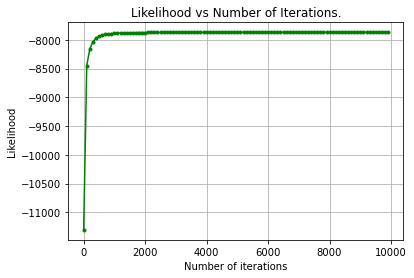

training precision:  0.8583874982713318
training recall:  0.8526098901098901
training accuracy:  0.747471098265896
testing precision:  0.8603594298698616
testing recall:  0.8569958847736625
testing accuracy:  0.7523482658959537

Map: de_inferno
Accuracy on training data (sklearn)= 0.748516
(0.733102475311017, 0.7034211174009353, 0.7179551592036676, None)


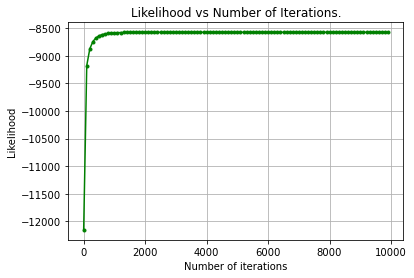

training precision:  0.8652725624757218
training recall:  0.8471192241871078
training accuracy:  0.748404076604323
testing precision:  0.8647810925997675
testing recall:  0.849476688867745
testing accuracy:  0.7498740131026373

Map: de_nuke
Accuracy on training data (sklearn)= 0.745024
(0.7497816048920504, 0.786284517733281, 0.7675993356330649, None)


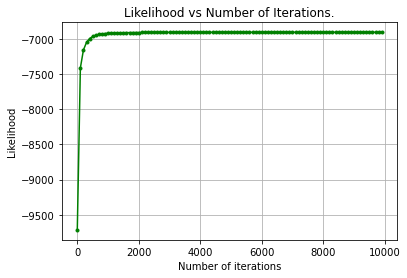

training precision:  0.8419553868058851
training recall:  0.867481662591687
training accuracy:  0.7460050462573591
testing precision:  0.8422675521821632
testing recall:  0.8677908113391984
testing accuracy:  0.7464788732394366

Map: de_mirage
Accuracy on training data (sklearn)= 0.751794
(0.7501825083953861, 0.7462599854756717, 0.7482161060142712, None)


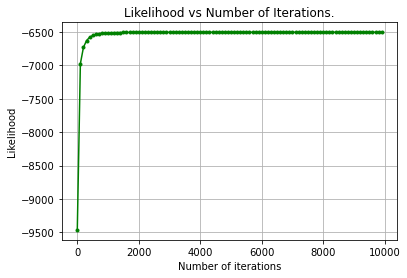

training precision:  0.8594288527818809
training recall:  0.8571077829609625
training accuracy:  0.7517226528854436
testing precision:  0.8468379446640316
testing recall:  0.8518886679920478
testing accuracy:  0.7381567614125754

Map: de_overpass
Accuracy on training data (sklearn)= 0.757481
(0.7502758367046708, 0.7722884724588303, 0.7611230295681373, None)


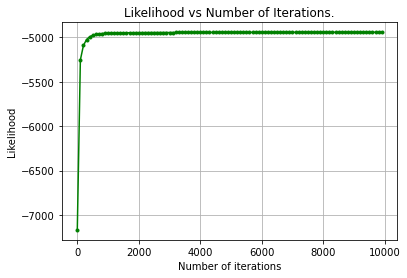

training precision:  0.8559222471430097
training recall:  0.8700466833134296
training accuracy:  0.7589015151515152
testing precision:  0.8617703656189866
testing recall:  0.86957928802589
testing accuracy:  0.7631354728770235

Map: de_cache
Accuracy on training data (sklearn)= 1.000000
(1.0, 1.0, 1.0, None)


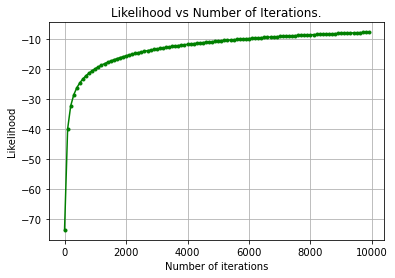

training precision:  0.9814814814814815
training recall:  1.0
training accuracy:  0.9814814814814815
testing precision:  0.9166666666666666
testing recall:  0.9705882352941176
testing accuracy:  0.8918918918918919

Map: de_vertigo
Accuracy on training data (sklearn)= 0.757304
(0.7443123061013444, 0.7350012764871074, 0.7396274887604367, None)


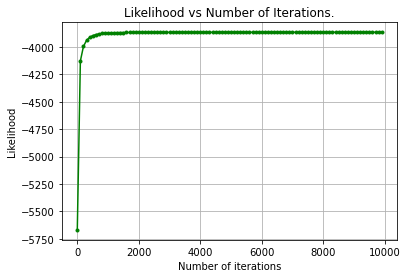

training precision:  0.8650164113785558
training recall:  0.8587915818058385
training accuracy:  0.7573036398467433
testing precision:  0.8605986059860599
testing recall:  0.8584867075664622
testing accuracy:  0.7536804308797127

Map: de_train
Accuracy on training data (sklearn)= 0.750049
(0.7528413910093299, 0.8054446460980036, 0.7782551512494519, None)


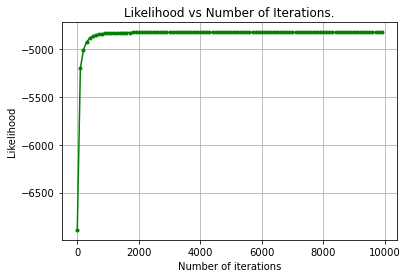

training precision:  0.8388594164456233
training recall:  0.8764434180138568
training accuracy:  0.7501482506424194
testing precision:  0.8465100893152497
testing recall:  0.8796837401168787
testing accuracy:  0.7586718055143788



In [9]:
logreg = LogisticRegression(C = 1000000)




learning_rate = 0.05
num_iters = 10000
for dataf in df_lst:
    print("Map:", dataf.iloc[0,dataf.columns.get_loc('map')])
    
    Y = np.array(dataf.loc[:, dataf.columns == 'round_winner'])
    
    dataf = dataf.drop(["map","round_winner"], axis = 1)

   
    Y=Y.astype(float)
    scaler = preprocessing.StandardScaler()
    X_scale = scaler.fit_transform(dataf)
    X_scale=X_scale.astype(float)
    
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=30)
    Y_train = Y_train.reshape(Y_train.shape[0],1)
    Y_test  = Y_test.reshape(Y_test.shape[0],1)
    
   
   

    Y_train_1d = Y_train.reshape(Y_train.shape[0],)
    logreg.fit(X_train, Y_train_1d)
    # Find the accuracy achieved on training set using logreg.score and y_train as type of int
    acc_logreg = logreg.score(X_train, Y_train_1d)
    print("Accuracy on training data (sklearn)= %f" % acc_logreg)
    y_hat_logreg = logreg.predict(X_train)
    print(precision_recall_fscore_support(Y_train_1d, y_hat_logreg, average = 'binary'))
    
    ones = np.ones((X_train.shape[0],1))
    ones_Te = np.ones((X_test.shape[0],1))
    X_train_1 = np.hstack((ones,X_train))
    X_test_1 = np.hstack((ones_Te,X_test))

    # Calculate w and likelihood values using Gradient_Ascent with X_train_1, y_2d_train
    w, likelihood_values = Gradient_Ascent(X_train_1, Y_train, learning_rate, num_iters)
    
    
    iters = np.array(range(0,num_iters,100))
    plt.plot(iters,likelihood_values,'.-',color='green')
    plt.xlabel('Number of iterations')
    plt.ylabel('Likelihood')
    plt.title("Likelihood vs Number of Iterations.")
    plt.grid()
    plt.show(block=False)
    
    Y_hat = predict(X_train_1,w)
    Y_hat_test = predict(X_test_1,w)
    
    precision, recall, accuracy = precision_recall_acc(Y_hat,Y_train,0.5)
    precision_Te, recall_Te, accuracy_Te = precision_recall_acc(Y_hat_test,Y_test,0.5)
    
    print('training precision: ', precision)
    print('training recall: ', recall)
    print('training accuracy: ', accuracy)
    print('testing precision: ', precision_Te)
    print('testing recall: ', recall_Te)
    print('testing accuracy: ', accuracy_Te)
    print()

In [10]:
w_logreg = logreg.coef_
print(w_logreg)
print(w)

[[-0.01667017  0.01569367 -0.11416023  0.          0.65516396 -0.6452443
   0.65823273 -0.63101712  0.08732765 -0.07205395  0.04860698 -0.45431707
  -0.01949357  0.34825394 -0.405274   -0.06976609  0.79680525 -0.59487876
  -0.03567803 -0.00132388  0.19563469 -0.19624359  0.31217486 -0.12552461
   0.04740291  0.06896412  0.16618911  0.02388647  0.0435307 ]]
[[ 2.47261979e-01]
 [-1.61179056e-02]
 [ 1.59040812e-02]
 [-1.14190673e-01]
 [ 0.00000000e+00]
 [ 6.07181445e-01]
 [-6.08091325e-01]
 [ 6.57763546e-01]
 [-6.31913827e-01]
 [ 8.65861289e-02]
 [-7.19811418e-02]
 [ 4.92537345e-02]
 [-4.52388376e-01]
 [-1.88389495e-02]
 [ 3.89166597e-01]
 [-4.35145127e-01]
 [-6.98184707e-02]
 [ 7.94278943e-01]
 [-5.92499796e-01]
 [-3.54801417e-02]
 [-3.08089444e-04]
 [ 1.95031062e-01]
 [-1.95901680e-01]
 [ 3.10579946e-01]
 [-1.25543284e-01]
 [ 4.72157908e-02]
 [ 6.89924362e-02]
 [ 1.65867321e-01]
 [ 2.38671618e-02]
 [ 4.32720400e-02]]
